# Visualização de nuvem de palavras

Para realizar a visualização de nuvem de palavras utilizaremos a biblioteca __wordcloud__ e a partir dos dados dos tweets do Bolsonaro executaremos uma limpeza para adequar os dados para a biblioteca, para isso é necessário a biblioteca __nltk__ com seu conjunto de _stopwords_ para que não sejam consideradas na visualização.

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giova\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [86]:
def create_word_cloud(string):
    maskArray = np.array(Image.open("cloud.png"))
    cloud = WordCloud(background_color = "white", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
    cloud.generate(string)
    cloud.to_file("wordCloud.png")

In [95]:
tweet_df = pd.read_csv("preprocessed_tweets.csv", sep = "~").drop(columns = ["Unnamed: 0"])
bolsonaro_df = tweet_df[tweet_df.name == "jairbolsonaro"]
print("O tweet mais antigo é de ", bolsonaro_df.date.min())
print("O tweet mais recente é de ", bolsonaro_df.date.max())

O tweet mais antigo é de  2019-05-16 17:22:36+00:00
O tweet mais recente é de  2020-07-27 20:51:13+00:00


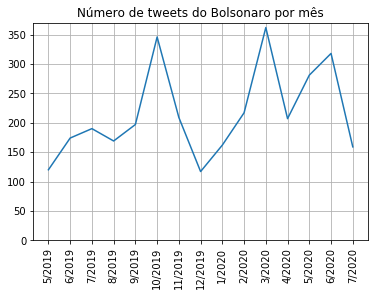

In [41]:
plot_data = bolsonaro_df.groupby(by = ["year", "month"]).count().reset_index()
plot_data["year-monthly"] = plot_data.month.apply(str) + "/" + plot_data.year.apply(str)
plt.plot(plot_data['year-monthly'], plot_data.full_text)
plt.title("Número de tweets do Bolsonaro por mês")
plt.xticks(rotation = 90)
plt.grid()
plt.ylim((0, 370))
plt.show()

Observando os dados que possuímos, dividiremos em 4 intervalos temporais para produzir 4 nuvens de palavras de cada um desses intervalos. Os intervalos serão:

- Início do dados até 01/09/2019.
- 01/09/2019 até 31/12/2019
- 01/01/2020 até 01/04/2020
- 01/04/2020 até o final dos dados.

In [83]:
def convert_tweets_to_text(df):
    df = df.full_text.str.lower() #everything lowercase
    df = df.str.replace('^https?:\/\/.*[\r\n]*', '', regex = True) #remove urls
    df = df.str.replace('[^A-zÀ-ú0-9 ]', '', regex = True) #keeps only alphanumerics and space 
    return "".join(df.tolist())

In [91]:
tweets_start_sep = convert_tweets_to_text(bolsonaro_df[((bolsonaro_df.date.min() < bolsonaro_df.date) 
                                                        & (bolsonaro_df.date < "2019-09-01"))])
tweets_sep_dec = convert_tweets_to_text(bolsonaro_df[(("2019-09-01" <= bolsonaro_df.date) 
                                                     & (bolsonaro_df.date <= "2019-12-31"))])
tweets_jan_mar = convert_tweets_to_text(bolsonaro_df[(("2020-01-01" <= bolsonaro_df.date) 
                                                     & (bolsonaro_df.date < "2020-04-01"))])
tweets_apr_end = convert_tweets_to_text(bolsonaro_df[(("2020-04-01" <= bolsonaro_df.date) 
                                                      & (bolsonaro_df.date <= bolsonaro_df.date.max()))])

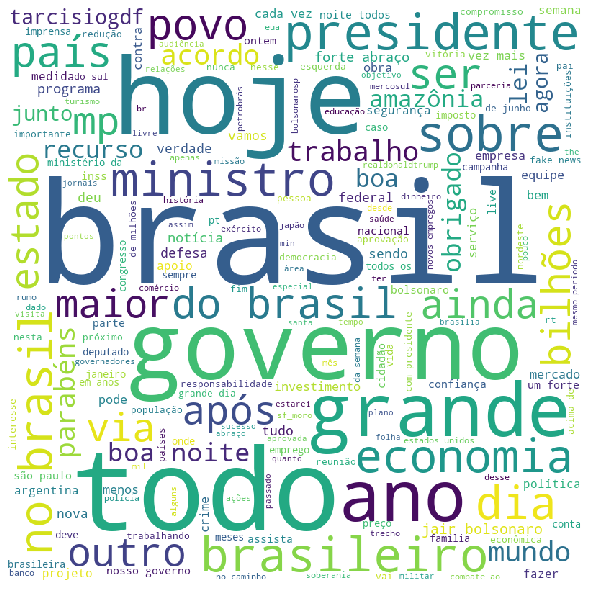

In [90]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                      stopwords = stopwords, min_font_size = 10).generate(tweets_start_sep) 
# plot the WordCloud images               
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

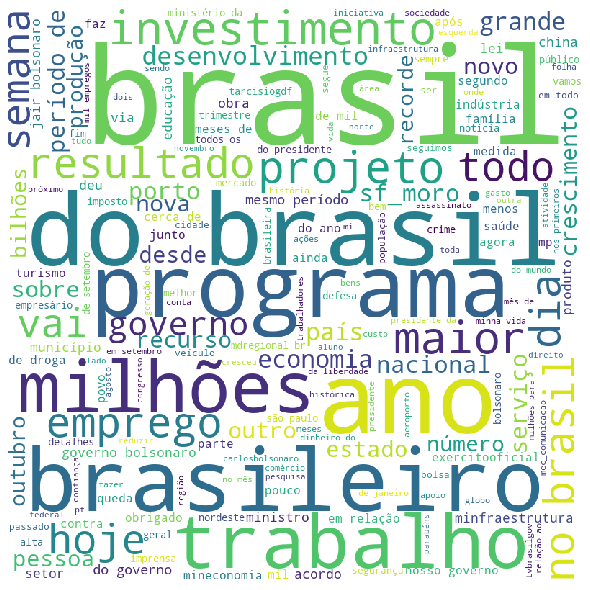

In [92]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                      stopwords = stopwords, min_font_size = 10).generate(tweets_sep_dec) 
# plot the WordCloud images               
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

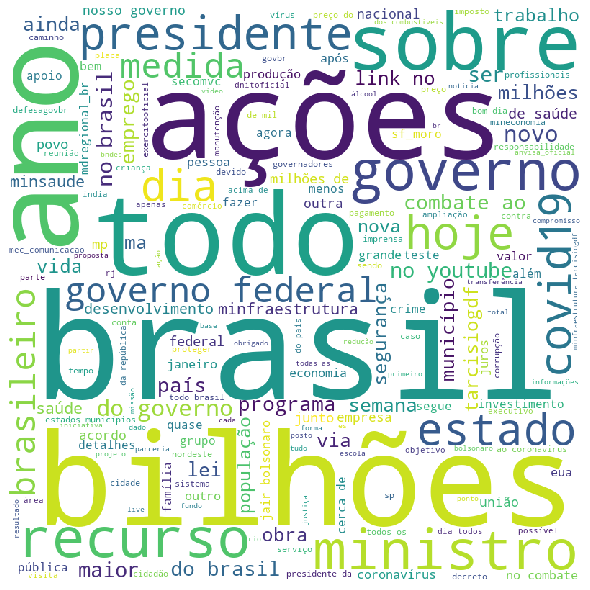

In [93]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                      stopwords = stopwords, min_font_size = 10).generate(tweets_jan_mar) 
# plot the WordCloud images               
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

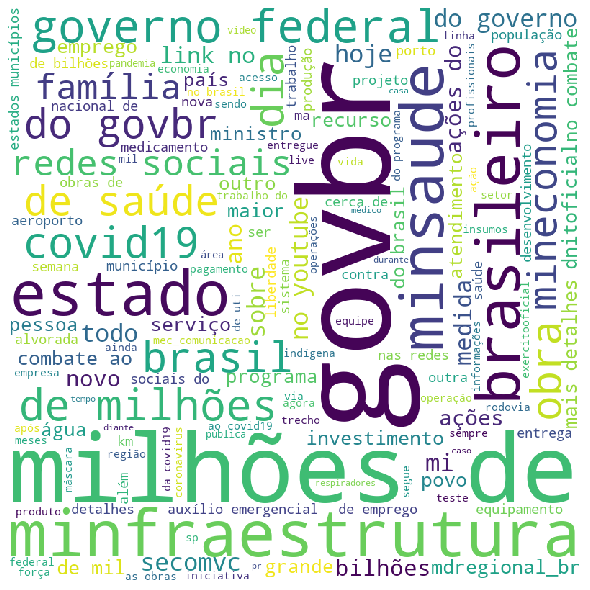

In [94]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                      stopwords = stopwords, min_font_size = 10).generate(tweets_apr_end) 
# plot the WordCloud images               
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 